In [93]:
# be aware you need over 10GB of avaliable space to run this notebook locally
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
# importing Image class from PIL package
from IPython import display

In [71]:
geo_muni=json.load(open('../../Data/geo_json_files/geo_muni.geojson','r'))

In [72]:
plotable_buildings_muni = pd.read_csv('../../Data/geo_json_files/dataframes_for_viz/muni_level_df.csv')

In [73]:
plotable_buildings_muni.drop(columns='Unnamed: 0',inplace=True)
plotable_buildings_muni.head()

building_id  district_id  vdcmun_id  ward_id  count_floors_pre_eq  \
0  120101000011           12      12007   120703                    1   
1  120101000021           12      12007   120703                    1   
2  120101000031           12      12007   120703                    1   
3  120101000041           12      12007   120703                    1   
4  120101000051           12      12007   120703                    1   

   count_floors_post_eq  age_building  plinth_area_sq_ft  height_ft_pre_eq  \
0                     1             9                288                 9   
1                     1            15                364                 9   
2                     1            20                384                 9   
3                     1            20                312                 9   
4                     1            30                308                 9   

   height_ft_post_eq  ... has_secondary_use_institution  \
0                  9  ...                             0   
1                  9  ...                             0   
2                  9  ...                             0   
3                  9  ...                             0   
4                  9  ...                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

  has_secondary_use_health_post has_secondary_use_gov_office  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

  has_secondary_use_use_police has_secondary_use_other      dist_nm  \
0                            0                       0  OKHALDHUNGA   
1                            0                       0  OKHALDHUNGA   
2                            0                       0  OKHALDHUNGA   
3                            0                       0  OKHALDHUNGA   
4                            0                       0  OKHALDHUNGA   

                     muni_nm  muni_id  
0  SIDDHICHARAN MUNICIPALITY      118  
1  SIDDHICHARAN MUNICIPALITY      118  
2  SIDDHICHARAN MUNICIPALITY      118  
3  SIDDHICHARAN MUNICIPALITY      118  
4  SIDDHICHARAN MUNICIPALITY      118  

[5 rows x 47 columns]

The actual code blocks below is what was used to produce the visuals from my presentation with only an alteration of color parameter for each of these maps. They require about 5GB of disk space to run, and about 4GB to stroe so for the purpose of reproducibility please run the cells below in stages. I would advise to split up into different into different notebooks themselves but would rather not have the user need to click through a variety of different tabs to view all visuals and respective code. 

I also imported the static image of what each code block displays for interactivity you will need to actually run the code blocks just above the image import

In [46]:
# looking at damage grade variation across municipalities
fig = px.choropleth_mapbox(plotable_buildings_muni.groupby('muni_id',as_index=False).count(), 
                           geojson=geo_muni, locations='muni_id', color='damage_grade',
                           color_continuous_scale="Viridis",
                           mapbox_style="stamen-terrain",
                           zoom=7,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

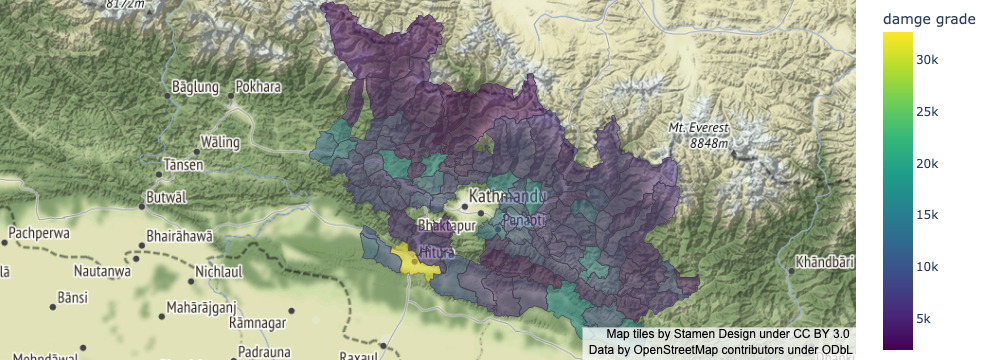

In [45]:
# creating a object
display.Image("../../Viz/muni_eda_viz/damage_grade_muni.png")

It is important to note that the scale is reading from the yellow to purple as damage grade 5 to 1. I previously plotted a single observation to confirm this.
So in this particular image we are able to see that the amount of buildings that that encountered the greatest amount of damage were those central and potentially northern part. Oddly enough there is one particular region experiencing a drastic amount of damage per municipality. 

In [49]:
# looking at damage grade variation across municipalities
fig = px.choropleth_mapbox(plotable_buildings_muni.groupby('muni_id',as_index=False).count(), 
                           geojson=geo_muni, locations='muni_id', color='damage_grade',hover_data=['damage_grade'],
                           color_continuous_scale="Viridis",
                           range_color=(0, 4),
                           mapbox_style="stamen-terrain",
                           zoom=4,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

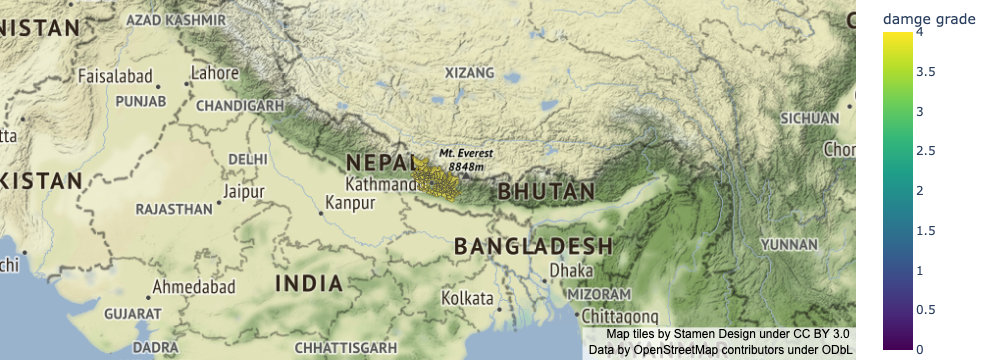

In [50]:
display.Image("../../Viz/muni_eda_viz/zoomed_out_nepal.png") # THIS IS ACTUALLY THE SAME AS THE FIRST CHORO MAP JUST ZOOMED OUT

In [56]:
# looking at dummified values (densities)
fig = px.choropleth_mapbox(plotable_buildings_muni.groupby('muni_id',as_index=False).count(),
                           geojson=geo_muni, locations='muni_id', color='age_building',hover_data=['damage_grade'],
                           color_continuous_scale="Plasma",
                           mapbox_style="stamen-terrain",
                           zoom=8,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

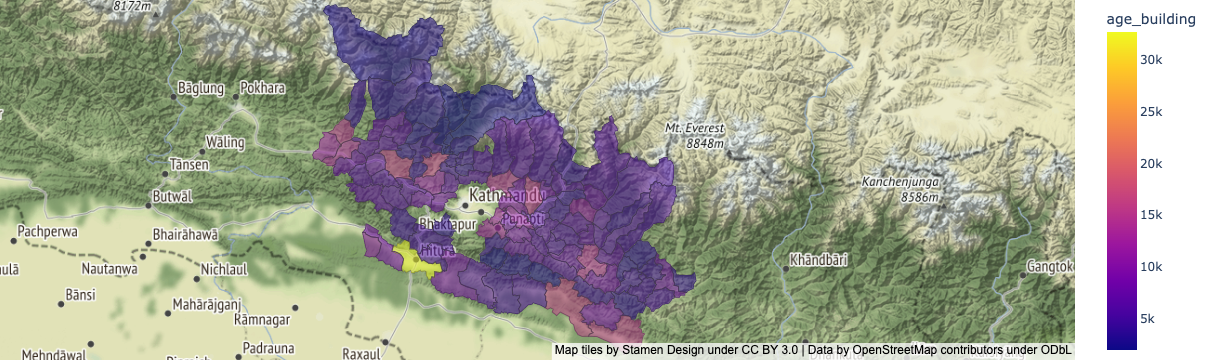

In [57]:
display.Image("../../Viz/muni_eda_viz/age_building.png")

The scale here goes from 0 on the bottom range (purple area) to 1000 years old on our scale in the Viz folder all of these individual observations plotted can be seen there for each respective feature decribed in the notebook. 

We can note that the one particular municipality that experienced the most damaged buildings also holds the most amount of older buildings so although the surronding municipalites were only made of mostly damage grade levels of 1-3 this particular region most likely had older buildings that were not fitted to endure such an extreme quake.

In [60]:
# looking at dummified values (densities)
fig = px.choropleth_mapbox(plotable_buildings_muni[plotable_buildings_muni['age_building']<=150].groupby('muni_id',as_index=False).count(), 
                           geojson=geo_muni, locations='muni_id', color='age_building',hover_data=['damage_grade'],
                           color_continuous_scale="Plasma",
                           mapbox_style="stamen-terrain",
                           zoom=8,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

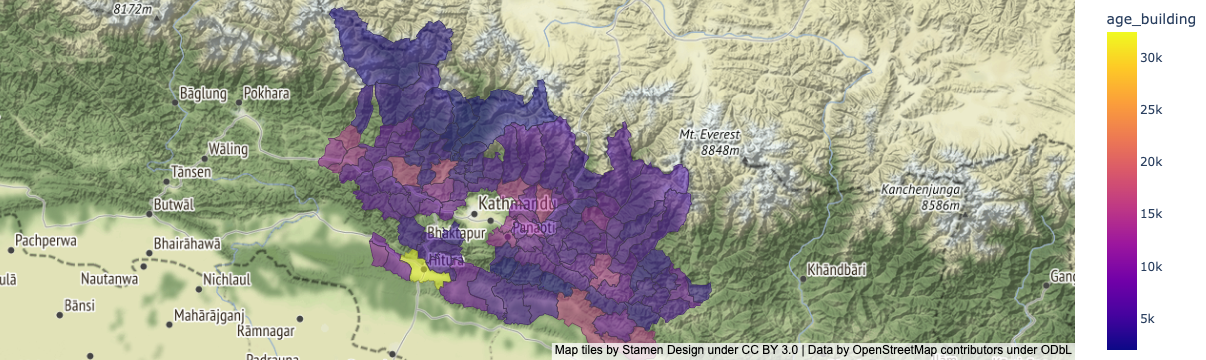

In [59]:
display.Image("../../Viz/muni_eda_viz/age_building_no_outliers.png")

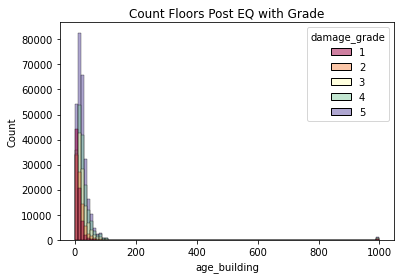

In [98]:
# quick review of the age distribution among the grades 
sns.histplot(data=plotable_buildings_muni, x="age_building",hue='damage_grade' ,palette='Spectral',bins=100);
plt.title('Count Floors Post EQ with Grade');

This particular feature goes from buildings with the age 0 to 1000 years, and this particular map has already dropped those buildings with the ages 150+ to be able to visualize the differnces among this region and check if the outliers did impact the visual. It appears to have turned out fairly similar to the distribution above with those outliers kept in. Since this map is prone to generalize the information a bit too much it can be an issue when interpretting the information.

In [ ]:
fig = px.choropleth_mapbox(plotable_buildings_muni.groupby('muni_id',as_index=False).count(),
                           geojson=geo_muni, locations='muni_id', color='count_floors_pre_eq',hover_data=['damage_grade'],
                           color_continuous_scale="Plasma",
                           mapbox_style="stamen-terrain",
                           zoom=8,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

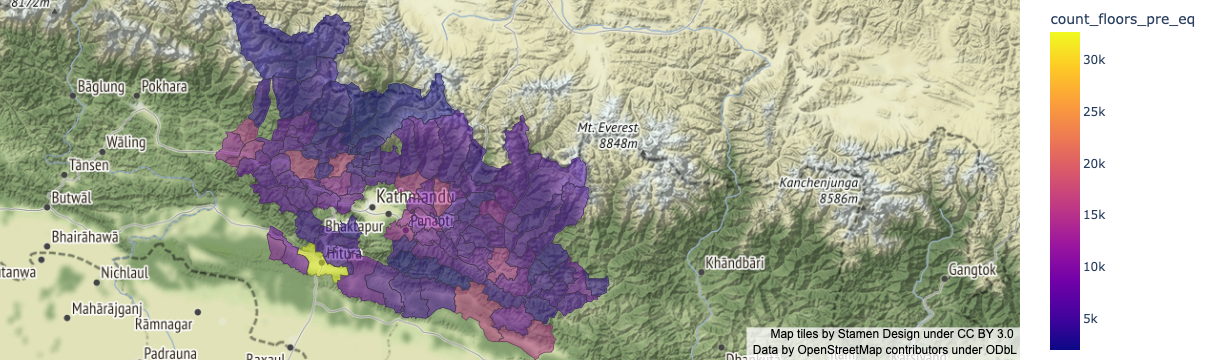

In [62]:
display.Image("../../Viz/muni_eda_viz/count_floors_pre_eq.png")

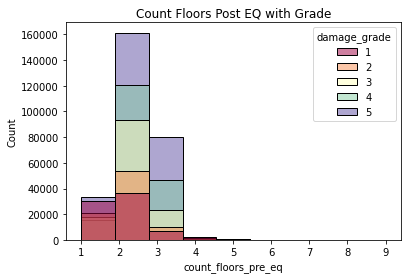

In [96]:
#quickly looking at data behind map 
sns.histplot(data=plotable_buildings_muni, x="count_floors_pre_eq",hue='damage_grade' ,palette='Spectral',bins=9);
plt.title('Count Floors Post EQ with Grade');

This particular feature goes from 1(purple) - 9(yellow) floors based on plot of singular observation. We can see that the regions with the taller buildings, (higher amount of floors) were in the same municipality that had the highest amount of buildings with the a larger damage grade and age.

In [ ]:
fig = px.choropleth_mapbox(plotable_buildings_muni.groupby('muni_id',as_index=False).count(),
                           geojson=geo_muni, locations='muni_id', color='count_floors_post_eq',hover_data=['damage_grade'],
                           color_continuous_scale="Plasma",
                           mapbox_style="stamen-terrain",
                           zoom=8,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

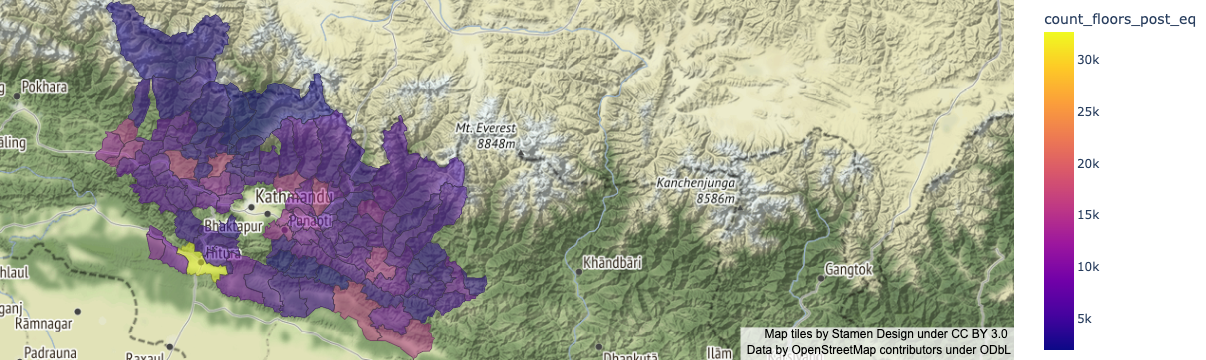

In [64]:
display.Image("../../Viz/muni_eda_viz/count_floors_post_eq.png")

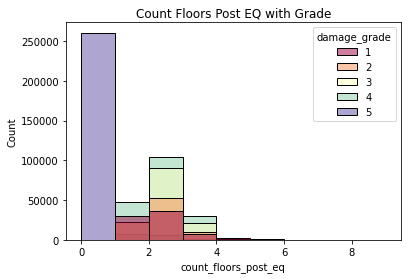

In [95]:
#quickly looking at data behind map 
sns.histplot(data=plotable_buildings_muni, x="count_floors_post_eq",hue='damage_grade' ,palette='Spectral',bins=9);
plt.title('Count Floors Post EQ with Grade');

We can see that the lower counts of floors post earthquake were generally in those northern parts of the affected region. 

---
Plotting with average feature occurence per municipality.

In [22]:
# looking at dummified values (densities)
fig = px.choropleth_mapbox(plotable_buildings_muni.groupby('muni_nm').mean(), geojson=geo_muni, locations='muni_id', color='has_secondary_use_hotel',
                           color_continuous_scale="Viridis",
                           #range_color=(0,,
                           mapbox_style="stamen-terrain",
                           zoom=7,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
has_secondary_use_hotel

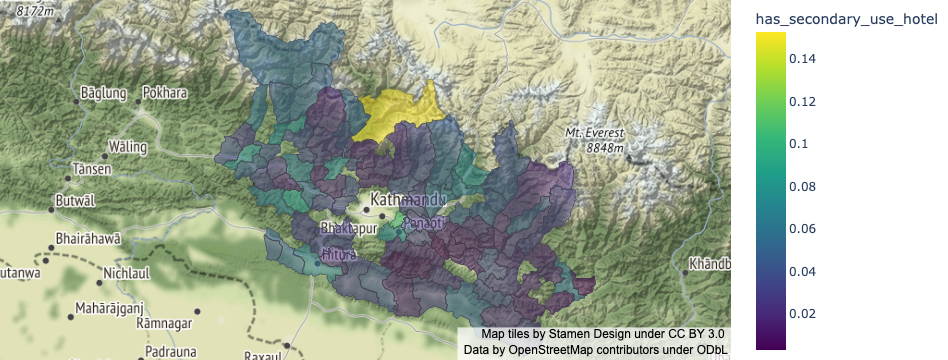

In [20]:
display.Image("../../Viz/has_secondary_use_hotel.png")

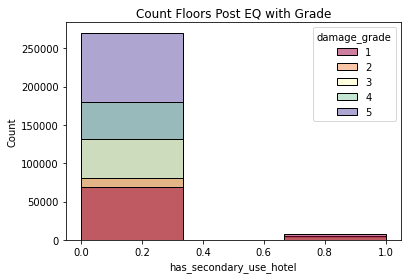

In [102]:
#quickly looking at data behind map 
sns.histplot(data=plotable_buildings_muni, x="has_secondary_use_hotel",hue='damage_grade' ,palette='Spectral',bins=3);
plt.title('Count Floors Post EQ with Grade');

These are very interesting plots so here we can see that the buildings average use in their respective municipalities are truly varied in these districts. So the municipality with the most occurence of hotel being a secondary use is in that northern region. What is interesting to notice is that on average the majority of hotels can be found up in that northern region of nepal denoted with yellow color. 

However it is important to note that there are only 26,694 of buildings that are used as a hotel as well so this in clearly showing how this map can oversimplify this data.

In [25]:
# looking at dummified values (densities)
fig = px.choropleth_mapbox(plotable_buildings_muni.groupby('muni_nm').mean(), geojson=geo_muni, locations='muni_id', color='has_secondary_use_gov_office',
                           color_continuous_scale="Viridis",
                           #range_color=(0,,
                           mapbox_style="stamen-terrain",
                           zoom=7,
                           opacity=0.5,center = {"lat": 27.711539475362535, "lon": 85.3249306241579},
                           labels={'damage_grade':'damge grade'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

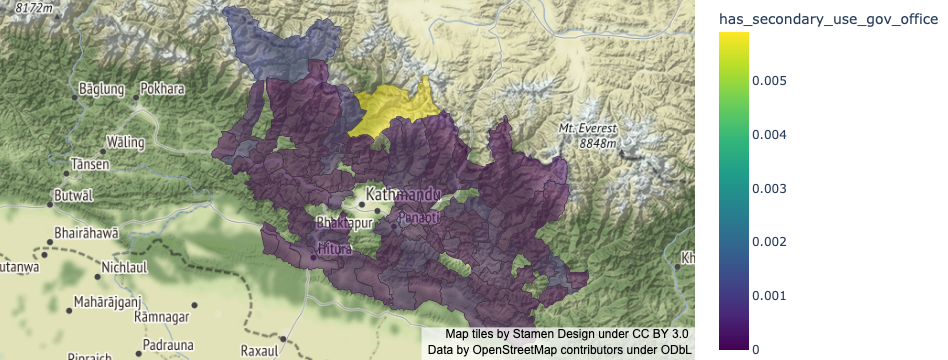

In [26]:
display.Image("../../Viz/has_secondary_use_gov_office.png")

In [104]:
plotable_buildings_muni['has_secondary_use_gov_office'].value_counts()

0    756873
1       142
Name: has_secondary_use_gov_office, dtype: int64

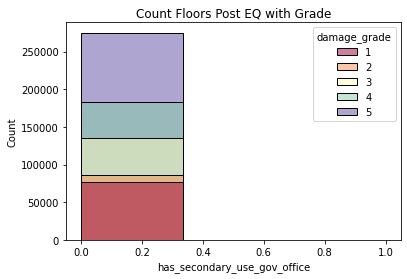

In [103]:
#quickly looking at data behind map 
sns.histplot(data=plotable_buildings_muni, x="has_secondary_use_gov_office",hue='damage_grade' ,palette='Spectral',bins=3);
plt.title('Secondary Use (Gov Office) Post EQ with Grade');

We can see that a majority of those buildings do not have government offices but those few offices are clearly in the same areas as those municipalities with hotels which also happened to have less occurences of higher level grade damage (based on first couple maps created above).